# likes(john,tom) example


In [5]:
from problog import get_evaluatable
from problog.program import PrologString
from problog.formula import LogicFormula, LogicDAG
from problog.ddnnf_formula import DDNNF
from problog.cnf_formula import CNF
import timeit
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import re
import networkx as nx

In [6]:
with open('model2.pl') as model:
    m = model.read()

In [7]:
lfs = []
dags = []
cnfs = []

In [8]:
times = []
door_num = range(1, 2)
for i in door_num:
    start = timeit.default_timer()
    model = m
    p = PrologString(model)
    formula = get_evaluatable().create_from(p)
    print(formula.evaluate())
    stop = timeit.default_timer()
    times.append(stop - start)

{likes(john,tom): 0.24000000000000005}


In [9]:
for i in door_num:
    model = m.format(door_num=i)
    p = PrologString(model)
    lf = LogicFormula.create_from(p)
    lfs.append(lf)
    dag = LogicDAG.create_from(lf)
    dags.append(dag)
    cnf = CNF.create_from(dag)
    cnfs.append(cnf)
    ddnnf = DDNNF.create_from(cnf)
    print(ddnnf.evaluate())
 

{likes(john,tom): 0.24000000000000005}


In [10]:
print(ddnnf)

1: atom(identifier=4, probability=True, group=None, name=None, source=None)
2: atom(identifier=2, probability=0.5, group=None, name=friendof(pedro,tom), source=None)
3: atom(identifier=3, probability=1.0, group=None, name=choice(0,0,likes(pedro,tom),pedro,tom), source=None)
4: atom(identifier=6, probability=True, group=None, name=None, source=None)
5: atom(identifier=5, probability=0.5, group=None, name=friendof(mary,pedro), source=None)
6: atom(identifier=8, probability=True, group=None, name=None, source=None)
7: atom(identifier=7, probability=0.8, group=None, name=choice(10,0,likes(mary,tom),mary,tom,pedro), source=None)
8: atom(identifier=9, probability=0.5, group=None, name=friendof(mary,tom), source=None)
9: atom(identifier=11, probability=True, group=None, name=None, source=None)
10: atom(identifier=10, probability=1.0, group=None, name=choice(0,0,likes(mary,tom),mary,tom), source=None)
11: atom(identifier=12, probability=True, group=None, name=None, source=None)
12: atom(identi

In [11]:
print(lfs[0])

1: atom(identifier=20, probability=0.5, group=None, name=friendof(john,mary), source=None)
2: atom(identifier=22, probability=0.5, group=None, name=friendof(mary,tom), source=None)
3: atom(identifier=(0, (mary, tom) {{}}, 0), probability=1.0, group=(0, (mary, tom) {{}}), name=choice(0,0,likes(mary,tom),mary,tom), source=None)
4: conj(children=(2, 3), name=None)
5: atom(identifier=21, probability=0.5, group=None, name=friendof(mary,pedro), source=None)
6: atom(identifier=23, probability=0.5, group=None, name=friendof(pedro,tom), source=None)
7: atom(identifier=(0, (pedro, tom) {{}}, 0), probability=1.0, group=(0, (pedro, tom) {{}}), name=choice(0,0,likes(pedro,tom),pedro,tom), source=None)
8: conj(children=(6, 7), name=None)
9: conj(children=(8, 5), name=None)
10: atom(identifier=(10, (mary, tom, pedro) {{}}, 0), probability=0.8, group=(10, (mary, tom, pedro) {{}}), name=choice(10,0,likes(mary,tom),mary,tom,pedro), source=None)
11: conj(children=(9, 10), name=None)
12: disj(children=(11

In [13]:
print(dags[0])

1: atom(identifier=20, probability=0.5, group=None, name=friendof(john,mary), source=None)
2: atom(identifier=23, probability=0.5, group=None, name=friendof(pedro,tom), source=None)
3: atom(identifier=(0, (pedro, tom) {{}}, 0), probability=1.0, group=(0, (pedro, tom) {{}}), name=choice(0,0,likes(pedro,tom),pedro,tom), source=None)
4: conj(children=(2, 3), name=None)
5: atom(identifier=21, probability=0.5, group=None, name=friendof(mary,pedro), source=None)
6: conj(children=(4, 5), name=None)
7: atom(identifier=(10, (mary, tom, pedro) {{}}, 0), probability=0.8, group=(10, (mary, tom, pedro) {{}}), name=choice(10,0,likes(mary,tom),mary,tom,pedro), source=None)
8: conj(children=(6, 7), name=None)
9: atom(identifier=22, probability=0.5, group=None, name=friendof(mary,tom), source=None)
10: atom(identifier=(0, (mary, tom) {{}}, 0), probability=1.0, group=(0, (mary, tom) {{}}), name=choice(0,0,likes(mary,tom),mary,tom), source=None)
11: conj(children=(9, 10), name=None)
12: disj(children=(8,

In [14]:
print(cnfs[0])

In [56]:
lfs_str = '''1: atom(identifier=20, probability=0.5, group=None, name=friendof(john,mary), source=None)
2: atom(identifier=23, probability=0.5, group=None, name=friendof(pedro,tom), source=None)
3: atom(identifier=(0, (pedro, tom) {{}}, 0), probability=1.0, group=(0, (pedro, tom) {{}}), name=choice(0,0,likes(pedro,tom),pedro,tom), source=None)
4: conj(children=(2, 3), name=None)
5: atom(identifier=21, probability=0.5, group=None, name=friendof(mary,pedro), source=None)
6: conj(children=(4, 5), name=None)
7: atom(identifier=(10, (mary, tom, pedro) {{}}, 0), probability=0.8, group=(10, (mary, tom, pedro) {{}}), name=choice(10,0,likes(mary,tom),mary,tom,pedro), source=None)
8: conj(children=(6, 7), name=None)
9: atom(identifier=22, probability=0.5, group=None, name=friendof(mary,tom), source=None)
10: atom(identifier=(0, (mary, tom) {{}}, 0), probability=1.0, group=(0, (mary, tom) {{}}), name=choice(0,0,likes(mary,tom),mary,tom), source=None)
11: conj(children=(9, 10), name=None)
12: disj(children=(8, 11), name=None)
13: conj(children=(1, 12), name=None)
14: atom(identifier=(10, (john, tom, mary) {{}}, 0), probability=0.8, group=(10, (john, tom, mary) {{}}), name=choice(10,0,likes(john,tom),john,tom,mary), source=None)
15: conj(children=(13, 14), name=likes(john,tom))'''

In [59]:
lfs_list = lfs_str.split('\n')
lfs_row_id = [row.split(':') for row in lfs_list]
for row in lfs_row_id:
    row[0] = int(row[0])
child_list = []
for row in lfs_row_id:
    if re.search('children', row[1]):
        children = re.findall(r'\d+', row[1])
        child_list.append([row[0],children])

In [86]:
edges = []
for row in child_list:
    for child in row[1]:
        edges.append((str(row[0]),child))
edges        

[('4', '2'),
 ('4', '3'),
 ('6', '4'),
 ('6', '5'),
 ('8', '6'),
 ('8', '7'),
 ('11', '9'),
 ('11', '10'),
 ('12', '8'),
 ('12', '11'),
 ('13', '1'),
 ('13', '12'),
 ('15', '13'),
 ('15', '14')]

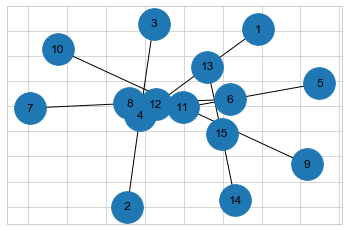

In [81]:
G = nx.DiGraph()
G.add_edges_from(edges)

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 1000)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.show()

In [85]:
from graphviz import Digraph

g = Digraph('G', filename='likes(john,tom) example.gv')

for e in edges:
    g.edge(e[0],e[1])

for node in lfs_row_id: 
    if node[1].split('name=')[1].split(', source=')[0] == 'None)':
        label = str(node[0])
    else:
        label = f'{node[0]}:{node[1].split("name=")[1].split(", source=")[0]}'    
    g.node(str(node[0]),label=label)

g.view()

'likes(john,tom) example.gv.pdf'